# Demonstrating the use of simple collaborative filtering algorithms on small data set which contains ratings of specific period.

In [316]:
import numpy as np
import pandas as pd

In [317]:
# df=pd.read_csv('spotify_data.csv',header=None, nrows=12000)
# df.columns = df.iloc[0]
# df = df[1:]
# df.head()

In [318]:
df=pd.read_csv('spotify_data.csv',header=None, nrows=12000)

df = df[1:]
df.head()#column order: song name, song id, artist name, artist id, link, image, ratings, date

,0,1,2,3,4,5,6,7
1,Guruvaram,58DAnVD65xKeQW3ARTBolV,Vijay Prakash,4iA6bUhiZyvRKJf4FNVX39,https://open.spotify.com/track/58DAnVD65xKeQW3...,https://i.scdn.co/image/ab67616d0000b27383ba53...,2018-03-10,59
2,Sayyaave,5rDlNHtDJl16JnKaPEOsQ3,Shankar Mahadevan,1SJOL9HJ08YOn92lFcYf8a,https://open.spotify.com/track/5rDlNHtDJl16JnK...,https://i.scdn.co/image/ab67616d0000b273275a2d...,2011-07-14,57
3,Kannuodu Kaanbadhalam,5XI8QHHWAF1iEhKNnnOqct,Nithyasree,6yLXX4buMky6p4XAwLmrNS,https://open.spotify.com/track/5XI8QHHWAF1iEhK...,https://i.scdn.co/image/ab67616d0000b27305077f...,1998-06-27,61
4,Kurukku Siruthvalea (From Mudhalvan),00QuXoF6LyKwH9xz7lXGdf,Hariharan,2NoJ7NuNs9nyj8Thoh1kbu,https://open.spotify.com/track/00QuXoF6LyKwH9x...,https://i.scdn.co/image/ab67616d0000b273d6f63a...,2013-05-13,54
5,Vennilave,4YjA4ibJwUvRCKitHwGLU3,Harisankar,2tRNoMJzgk0Fn8Iy2db0rK,https://open.spotify.com/track/4YjA4ibJwUvRCKi...,https://i.scdn.co/image/ab67616d0000b27365c26a...,2018-07-08,54


In [319]:
df.shape

(99, 8)

In [320]:
n_artist = df[3].unique().shape[0]
n_song = df[1].unique().shape[0]
n_rating = df[7].unique().shape[0]

print ('%i unique artist' %n_artist)
print ('%i unique song' %n_song)
print ('%i unique ratings' %n_rating)

61 unique artist
99 unique song
20 unique ratings


In [321]:
#generate user-item matrix
ratings=df.pivot(index=3, columns=1, values=7)
ratings

1,00PXj8pxWLJ3apEnCPJTNI,00QuXoF6LyKwH9xz7lXGdf,03GldviaGI7cvpCBuuyrrP,09KdVJCUon1OvPmST9uJKt,0QBuP7vvKyoGAMlUBDJVWn,0QuBYwamB56c3OOW5JAFS8,0Tr96i1fHT4YhdYh5pXHUk,0YNz2Qdl3C60BgVrSBVSJA,0ZGicTeWpoIMpJax3NAuhn,0cVrLxeQjiAcftuGzp32qY,...,6voQcZ46RMVPfg6O7sBn5U,748ih9gzoNJ90rmyF2SH6y,7FEWG1bL31YAcnxJQvxJJO,7L2D6W7e8mn0zf8cH78Ch4,7eTLnhsPWXcfQWcRg3YFj5,7fIAlEFbasrx4TAM3QcpSM,7heMX7gyHP0mhTlNgd7Lxd,7jealCIagU5YyWB3WQYVoV,7qVpqgrADqHIHqS9GE9RTg,7rUHVRy3jgrP9vIIJDuZ2G
3,,,,,,,,,,,,,,,,,,,,,
0QkALWjhQrP8pflLVoMYpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0WiZi3Q419nMpAQEqfBCbk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0a4PNswQHfm1lfnOCTjVeh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0aUQnP4HhUQXcurZl9GJIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0rL4uL3xfYOt2p7NHhS8qr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7pdqSPB4dkmIhAs4TpN6bR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7qjJw7ZM2ekDSahLXPjIlN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7wkeZcQtvDAeGvrTQO2hfK,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
ratings=ratings.fillna(0).values
ratings=np.array(ratings, dtype=int)
ratings

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 57,  0,  0]])

In [323]:
print(ratings.nonzero()[0],"\n",ratings.nonzero()[1],
ratings.shape[0])
ratings.shape[1]

[ 0  1  1  2  3  4  4  4  5  6  6  7  8  9 10 11 12 13 13 13 13 13 13 13
 13 13 14 14 15 16 17 17 17 17 18 19 20 20 20 20 21 22 22 22 23 24 25 26
 27 28 29 30 31 32 33 33 34 35 36 37 38 38 38 38 38 39 40 41 41 41 42 43
 44 44 44 44 45 46 47 48 49 50 50 50 50 51 51 52 53 54 55 56 57 57 57 58
 59 59 60] 
 [61 21 31 35 30 41 47 57 88 23 52 58 56 18 80 87 73  4  9 20 22 65 72 74
 91 95 44 66 38 94  2 24 43 60 27  7  1  8 50 71 15  5 49 90 54 79 29 11
 67 14 76 77 28 45 75 83 17 69 62 86 37 46 51 53 78 68 19  6 25 36 81  0
 12 42 63 85 89 97 98 26 64 13 34 39 84 10 92 93 32 70 59 40 16 55 82  3
 33 48 96] 61


99

In [324]:
sparsity = float(len(ratings.nonzero()[0]))
print(sparsity)

sparsity /= (ratings.shape[0] * ratings.shape[1])
print(sparsity)

sparsity *= 100
print ('percentage of artist-song user rating: {:.2f}%'.format(sparsity))

99.0
0.01639344262295082
percentage of artist-song user rating: 1.64%


In [325]:
# This creats a validation dataset by selecting rows (user) that have 35 or more ratings, then randomly select 15 of those ratings
#for validation set, but set those values to 0 in the training set.

def train_test_split(ratings):
    
    validation = np.zeros(ratings.shape)
    train = ratings.copy() #did't do train=ratings, other wise, ratings becomes empty
    
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0])>=35:# 35 seems to be best, it depends on sparsity of your user-item matrix
            val_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=15, #tweak this, 15 seems to be optimal
                                        replace=False)
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    print(validation.shape)
    return train, validation

In [326]:
train, val = train_test_split(ratings)

(61, 99)


In [327]:
val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [328]:
from numpy import linalg as LA

In [329]:
#ratings.dot(ratings.T)

In [330]:
def cos_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
        norms=np.array(LA.norm(ratings)*LA.norm(ratings.T))
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
        norms = np.array(LA.norm(ratings.T)*LA.norm(ratings))
    return (sim / norms )

In [331]:
user_similarity = cos_similarity(train, kind='user')
item_similarity=cos_similarity(train, kind='item')
print (user_similarity[-10:, 10:])
#print (item_similarity[-10:, 10:])

[[2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.30071880e-02 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15]
 [2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.80233715e-15 2.80233715e-15 2.80233715e-15
  2.80233715e-15 2.802

# Generate prediction using cosine similarity matrix as weights (memory based) and adjusting bias for individual user by mean-subtraction of rating

In [332]:
def predict_nobias(ratings, similarity, kind='user'):
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        ratings = (ratings - user_bias[:, np.newaxis]).copy()
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
        pred += user_bias[:, np.newaxis]
    elif kind == 'item':
        item_bias = ratings.mean(axis=0)
        ratings = (ratings - item_bias[np.newaxis, :]).copy()
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred += item_bias[np.newaxis, :]
        
    return pred

In [333]:
user_prediction2 = predict_nobias(train, user_similarity, kind='user')
item_prediction2 = predict_nobias(train, item_similarity, kind='item')
print(user_prediction2)


[[1.10556009e-11 8.75755024e-12 1.01938458e-11 ... 9.61930535e-12
  8.75743922e-12 9.33197963e-12]
 [1.14477317e-11 1.01492148e-11 1.09607878e-11 ... 1.06361586e-11
  1.01492148e-11 1.04738440e-11]
 [1.01477715e-11 8.19466717e-12 9.41535738e-12 ... 8.92708130e-12
  8.19455614e-12 8.68294325e-12]
 ...
 [1.03173026e-11 8.30158164e-12 9.56146273e-12 ... 9.05753250e-12
  8.30158164e-12 8.80551188e-12]
 [1.02458042e-11 9.19375687e-12 9.85123094e-12 ... 9.58833013e-12
  9.19375687e-12 9.45687972e-12]
 [1.14658283e-11 9.00346464e-12 1.05425668e-11 ... 5.70000000e+01
  9.00346464e-12 9.61908331e-12]]


In [334]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [335]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))
print ('User-based bias-adjusted CF RMSE: %.2f' %rmse(val,user_prediction2))
print ('Item-based bias-adjusted CF RMSE: %.2f' %rmse(val,item_prediction2))

User-based bias-adjusted CF RMSE: 7.69
Item-based bias-adjusted CF RMSE: 7.69


# Using Stochastic Gradient Descend method to update the above low rank matrices for the latent features . 

In [336]:
#P is latent user feature matrix
#Q is latent item feature matrix
def prediction(P,Q):
    return np.dot(P.T,Q)

In [337]:
lmbda = 0.4 # Regularization parameter
k = 3 #tweak this parameter
m, n = train.shape  # Number of users and items
n_epochs = 100  # Number of epochs
alpha=0.01  # Learning rate

P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix

In [338]:
train_errors = []
val_errors = []

#Only consider items with ratings 
users,items = train.nonzero()      
for epoch in range(n_epochs):
    for u, i in zip(users,items):
        e = train[u, i] - prediction(P[:,u],Q[:,i])  # Calculate error for gradient update
        P[:,u] += alpha * ( e * Q[:,i] - lmbda * P[:,u]) # Update latent user feature matrix
        Q[:,i] += alpha * ( e * P[:,u] - lmbda * Q[:,i])  # Update latent item feature matrix
    
    train_rmse = rmse(train,prediction(P,Q))
    val_rmse = rmse(val,prediction(P,Q)) 
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

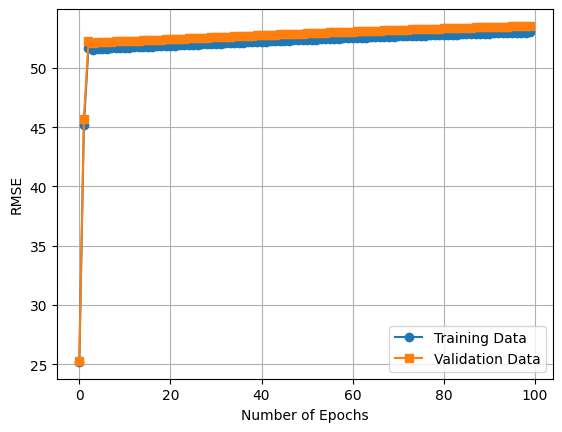

In [339]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), val_errors, marker='s', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

# Take a look at prediction vs. actual ratings

In [340]:
SGD_prediction=prediction(P,Q)

In [341]:
estimation= SGD_prediction[train.nonzero()]
ground_truth = train[train.nonzero()]
results=pd.DataFrame({'prediction':estimation, 'actual rating':ground_truth})

In [342]:
results.head()

,prediction,actual rating
0,58.600736,59
1,55.587370,56
2,54.607961,55
3,63.602464,64
4,53.601470,54
